<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right"> 

<h1 align=left><font size = 8, style="color:rgb(200,0,0)"><b>Ciência de Dados </b></font></h1> 
<h1 align=left><font size = 5, style="color:rgb(0,0,0)"><b>Paradigmas de Linguagens de
Programação para Ciência de Dados</b></font></h1> 

# 4 Estudos de Caso de Análise de Dados I
Professores: *Diego Nogare* & *Rogério de Oliveira* 

<br>
<br>

---


# Exercícios

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# WHO Worl Health Organization

Os dados abaixo foram obtidos diretamente da Organização Mundial de Saúde. Empregue os dados de 2015 já selecionados abaixo para responder as perguntas.

In [104]:
WHO = pd.read_csv('https://raw.githubusercontent.com/Rogerio-mack/Visualizacao-de-Dados-em-Python/main/data/Life_Expectancy_Data.csv')
WHO.rename(columns={' BMI ':'BMI', 'Life expectancy ':'Life_expectancy'}, inplace=True)
WHO = WHO[ WHO.Year == 2015 ]
WHO.head()

,Country,Year,Status,Life_expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
16,Albania,2015,Developing,77.8,74.0,0,4.60,364.975229,99.0,0,58.0,0,99.0,6.00,99.0,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2
32,Algeria,2015,Developing,75.6,19.0,21,NaN,0.000000,95.0,63,59.5,24,95.0,NaN,95.0,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4
48,Angola,2015,Developing,52.4,335.0,66,NaN,0.000000,64.0,118,23.3,98,7.0,NaN,64.0,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4
64,Antigua and Barbuda,2015,Developing,76.4,13.0,0,NaN,0.000000,99.0,0,47.7,0,86.0,NaN,99.0,0.2,13566.954100,NaN,3.3,3.3,0.784,13.9


# Qualidade dos Dados

Verifique a Qualidade dos Dados. Quantos atributos apresentam dados ausentes a qual atributo tem o maior percentual de dados ausentes?

In [105]:
WHO.isnull().sum() / len(WHO)

Country                            0.000000
Year                               0.000000
Status                             0.000000
Life_expectancy                    0.000000
Adult Mortality                    0.000000
infant deaths                      0.000000
Alcohol                            0.967213
percentage expenditure             0.000000
Hepatitis B                        0.049180
Measles                            0.000000
BMI                                0.010929
under-five deaths                  0.000000
Polio                              0.000000
Total expenditure                  0.989071
Diphtheria                         0.000000
 HIV/AIDS                          0.000000
GDP                                0.158470
Population                         0.224044
 thinness  1-19 years              0.010929
 thinness 5-9 years                0.010929
Income composition of resources    0.054645
Schooling                          0.054645
dtype: float64

In [106]:
(WHO.isnull().sum() > 0).sum()

10

# Qualidade dos Dados

Alguns países estão classificados como países *em desenvolvimento* e parecem destoar do nosso entendimento geral de países *desenvolvidos $\times$ em desenvolvimento*. Quais dois países parecem se enquadrar neste caso?

(Dica: verifique os países em desenvolvimento que apresentam um GDP que discrepante dos demais) 

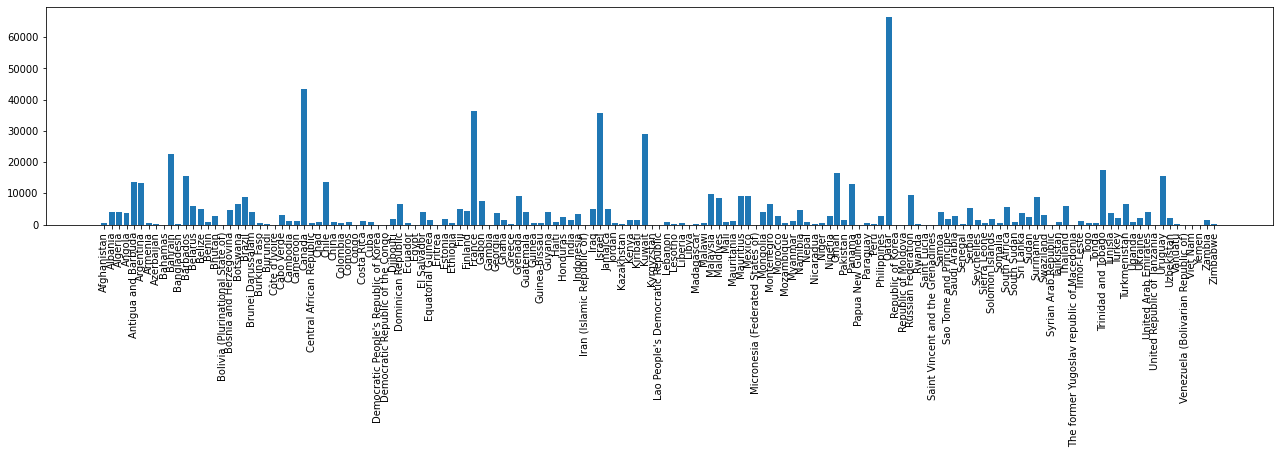

In [107]:
plt.figure(figsize=(22,4))
plt.bar(WHO[ WHO.Status == 'Developing' ].Country, WHO[ WHO.Status == 'Developing' ].GDP)
plt.xticks(rotation=90)
plt.show()

# Distribuição dos Dados

Analise a Distribuição da Expectativa de Vida entre os países Desenvolvidos e em Desenvolvimento. O que você consegue afirmar sobre essas distribuições? 

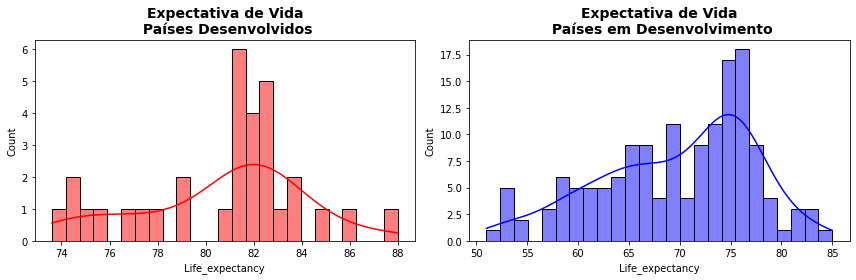

In [108]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(data=WHO[ WHO.Status == 'Developed' ], x='Life_expectancy', kde=True, color="red", ax=axs[0], bins=25)
axs[0].set_title('Expectativa de Vida\n Países Desenvolvidos', fontsize=14, weight='bold') 

sns.histplot(data=WHO[ WHO.Status == 'Developing' ], x='Life_expectancy', kde=True, color="blue", ax=axs[1], bins=25)
axs[1].set_title('Expectativa de Vida\n Países em Desenvolvimento', fontsize=14, weight='bold') 

plt.tight_layout()
plt.show()

# Relações

Quais índices aparecem como mais correlacionados a Expectativa de Vida dos países em Desenvolvimento?  

In [109]:
WHO[ WHO.Status == 'Developing' ][['Life_expectancy', 'Adult Mortality',
       'infant deaths', 'percentage expenditure', 'Hepatitis B',
       'Measles ', 'BMI', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling']].corr().abs()['Life_expectancy'].sort_values(ascending=False).nlargest(5)

Life_expectancy                    1.000000
Total expenditure                  1.000000
Income composition of resources    0.879141
Schooling                          0.773423
Adult Mortality                    0.742151
Name: Life_expectancy, dtype: float64

# Ranking

Qual a posição do Brasil no Ranking de Escolaridade (`Schooling`) com relação aos demais países? 

In [110]:
WHOSchool = pd.DataFrame( WHO[['Country','Schooling']].sort_values('Schooling',ascending=False) ).reset_index(drop=True)
WHOSchool[WHOSchool.Country == 'Brazil']

,Country,Schooling
39,Brazil,15.2
